#### Continuation from the last part of 11.ipynb

In [1]:
import pandas as pd
import numpy as np
import lightgbm
from mypython import PurgedGroupTimeSeriesSplit as tss
import mypython.BactTest as bt
from sklearn import metrics

import time
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/home/qianshuofu/anaconda3/envs/rapids-22.12/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def model_strategy_return(x_path = '/home/qianshuofu/factor_qianshuofu/Data/data_feature.npy', 
                          Y_path = '/home/qianshuofu/factor_qianshuofu/Data/data_label_oc_1.npy',
                          groups_path = '/home/qianshuofu/factor_qianshuofu/Data/data_index.npy',
                          parameters=[(0.1,0.1,0.003)]):
    days = int(Y_path[-5])
    close_open = (Y_path[-8] == 'o')

    x,Y = np.load(x_path),np.load(Y_path)
    y_return_oc, y_return_cc, y = Y[:,0], Y[:,1], Y[:,2]
    groups = np.load(groups_path,allow_pickle=True)

    cv = tss.PurgedGroupTimeSeriesSplit(n_splits=2)
    (train_index, test_index) = next(cv.split_2(x,y,groups[:,1],splits_minus=1))  # Just split one time to do research
    x_train, y_train, x_test, y_true, groups_train, groups_test = x[train_index], y[train_index], x[test_index], y[test_index], groups[:,1][train_index], groups[:,1][test_index]

    dataset = lightgbm.Dataset(x_train, y_train)
    model = lightgbm.train(params={}, train_set=dataset)
    y_pred = model.predict(x_test)

    tss.plot_ic(y,[test_index],[y_pred],groups[:,1],continuous=True)
    for (l,s,c) in parameters:
      u,daily_return = bt.strategy_return(Y[test_index],y_pred,groups[test_index],hold_days=days,ahead_steps=days,close_open=close_open,\
                                      long_ratio=l,short_ratio=s,cost_ratio=c)

n_groups:964,n_splits:1
group_test_starts:range(771, 964, 193)
group_train_starts:range(0, 193, 193)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.836899 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256275
[LightGBM] [Info] Number of data points in the train set: 725825, number of used features: 1005
[LightGBM] [Info] Start training from score -0.002670
n_groups:964,n_splits:1
group_test_starts:range(771, 964, 193)
group_train_starts:range(0, 193, 193)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.373920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256275
[LightGBM] [Info] Number of data points in the train set: 725825, number of used features: 1005
[LightGBM] [Info] Start training from score -0.020333
n_groups:964,n_splits:1
group_test_starts:range(771, 964, 193)
group_train_starts:range(0, 193, 

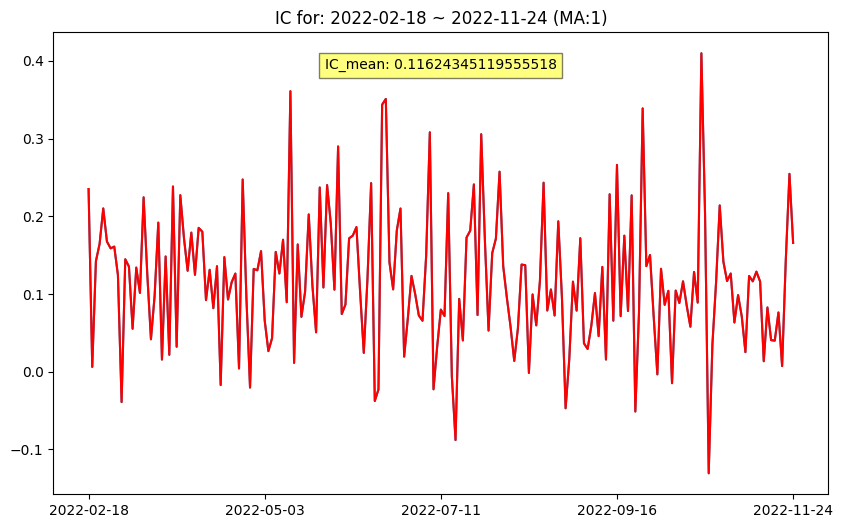

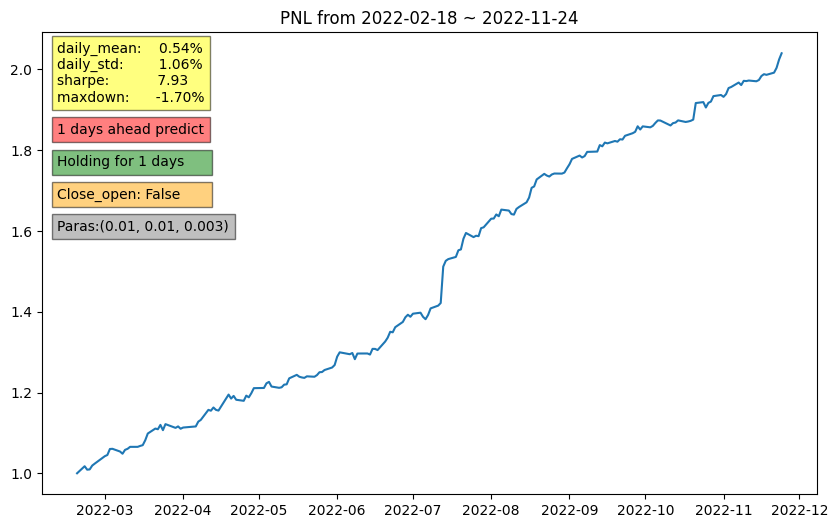

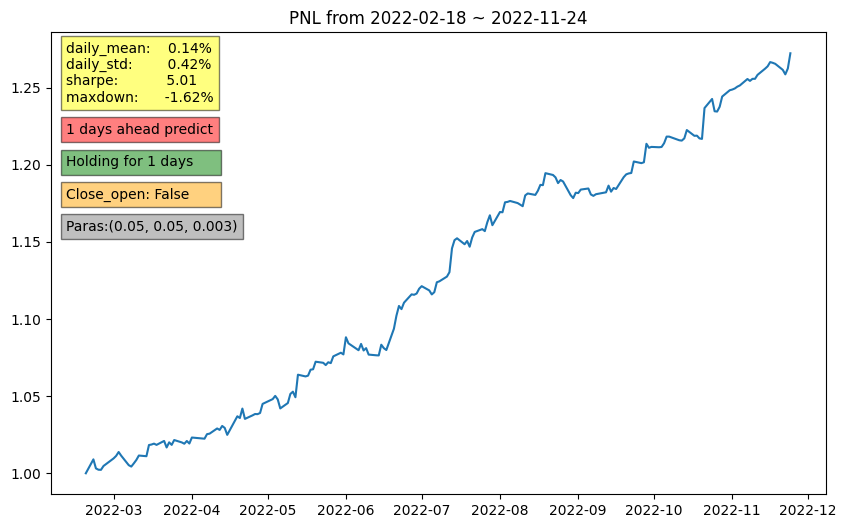

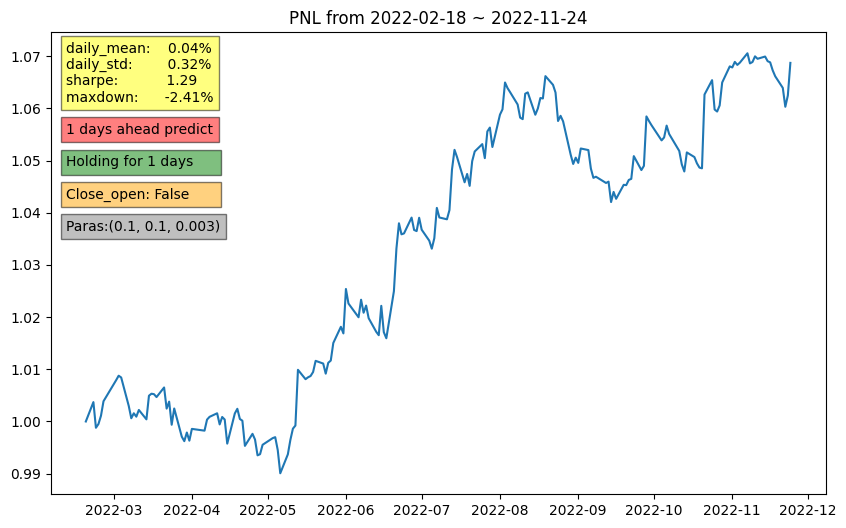

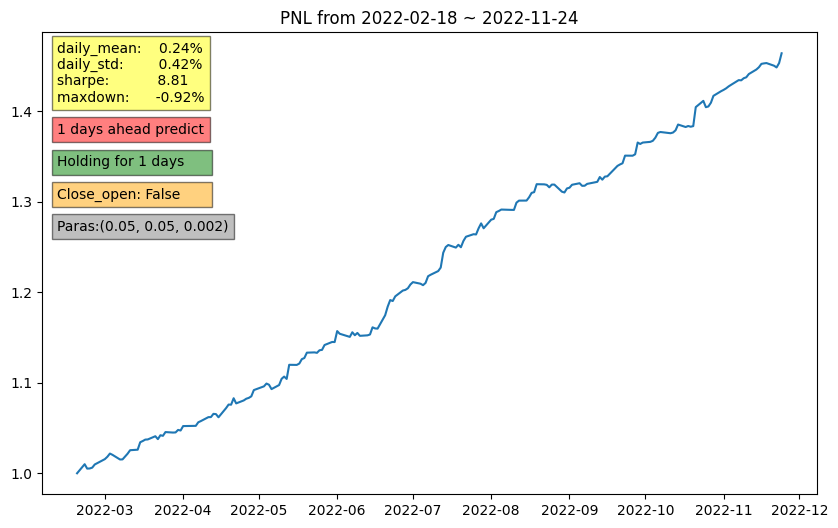

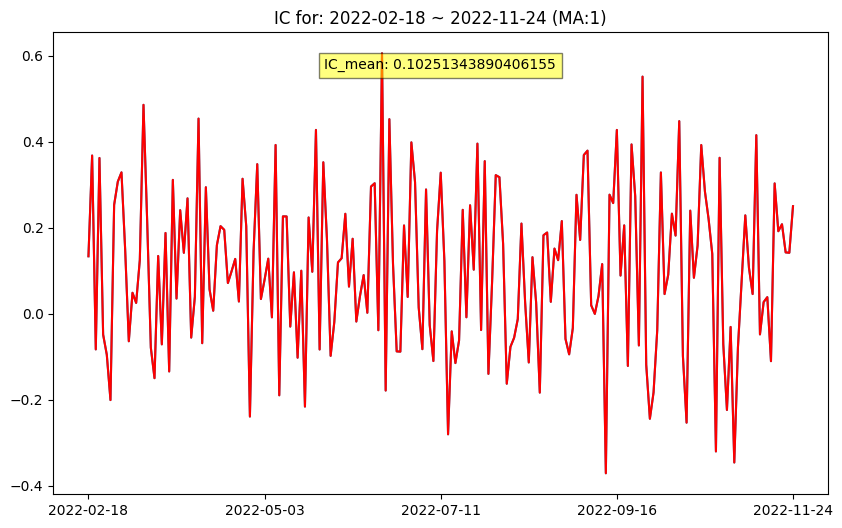

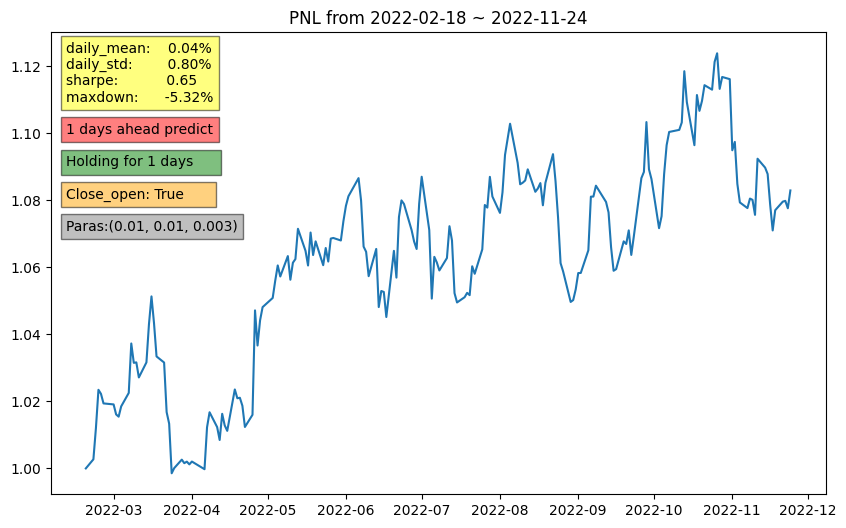

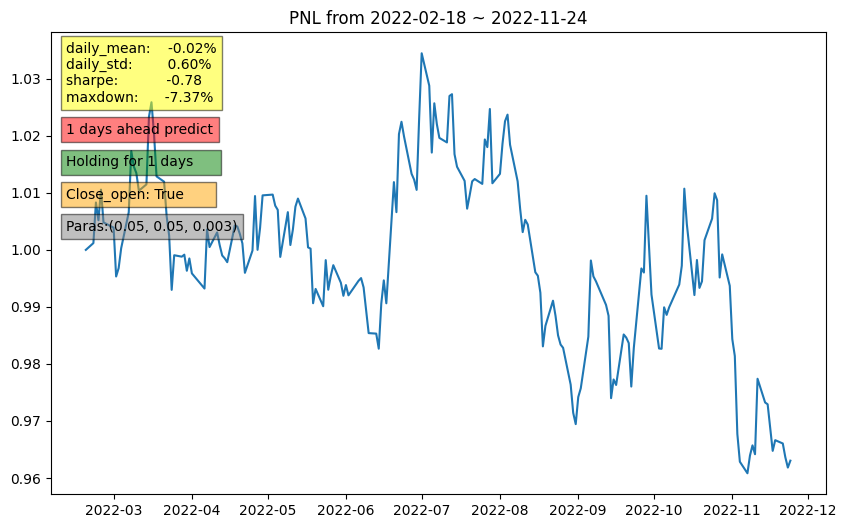

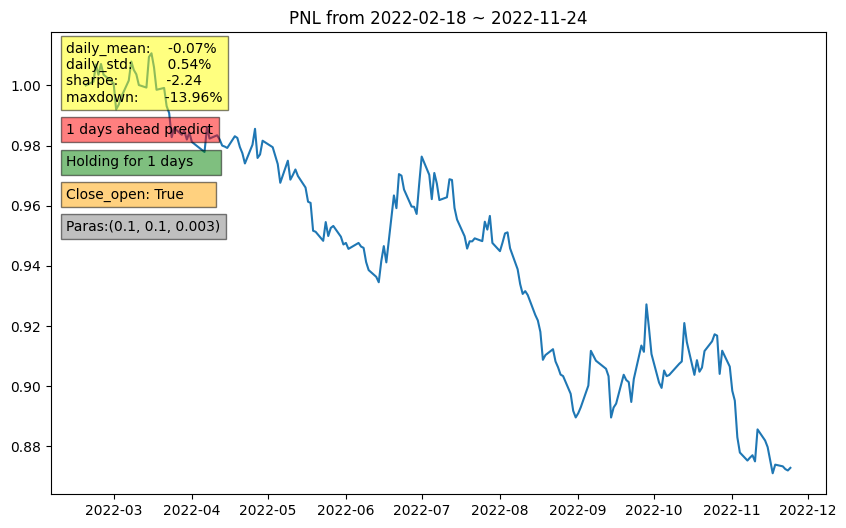

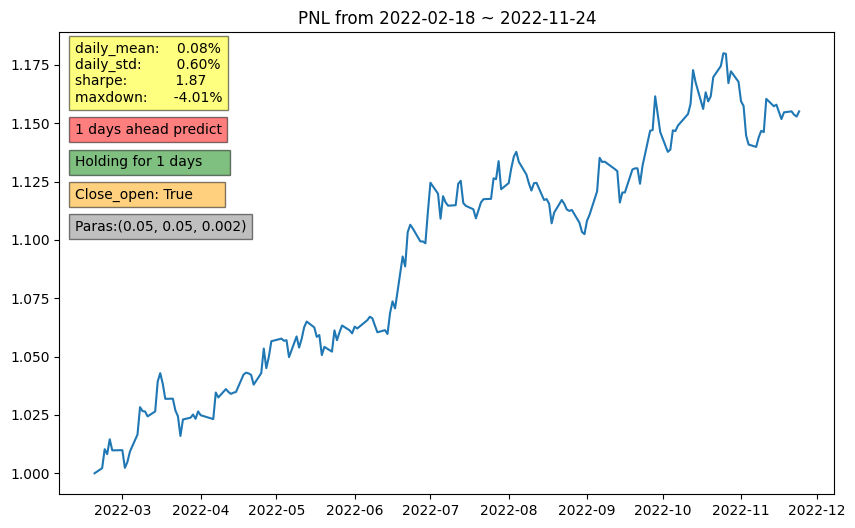

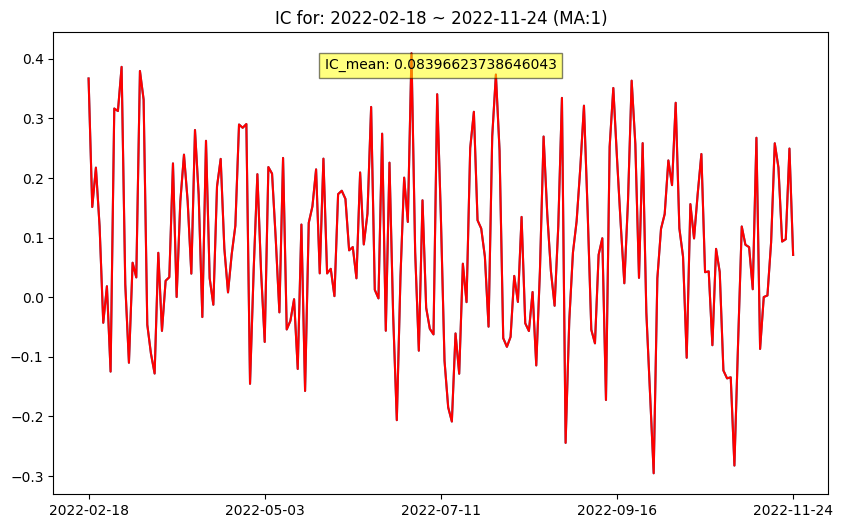

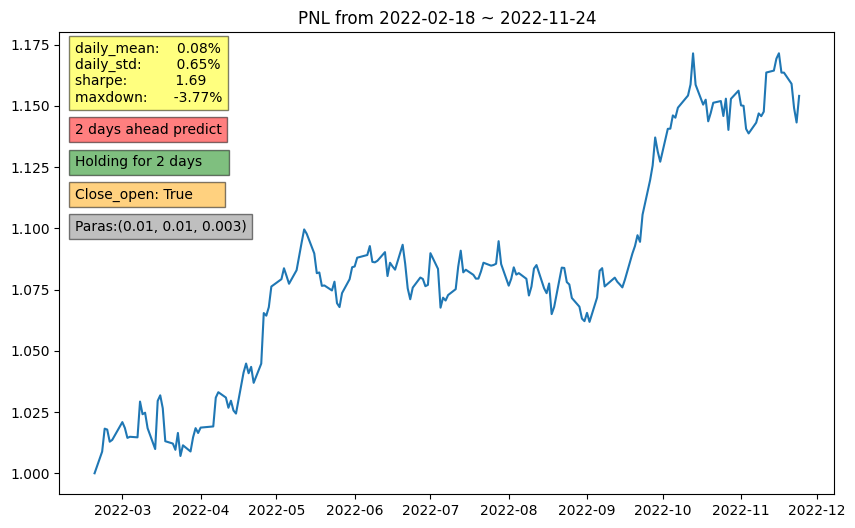

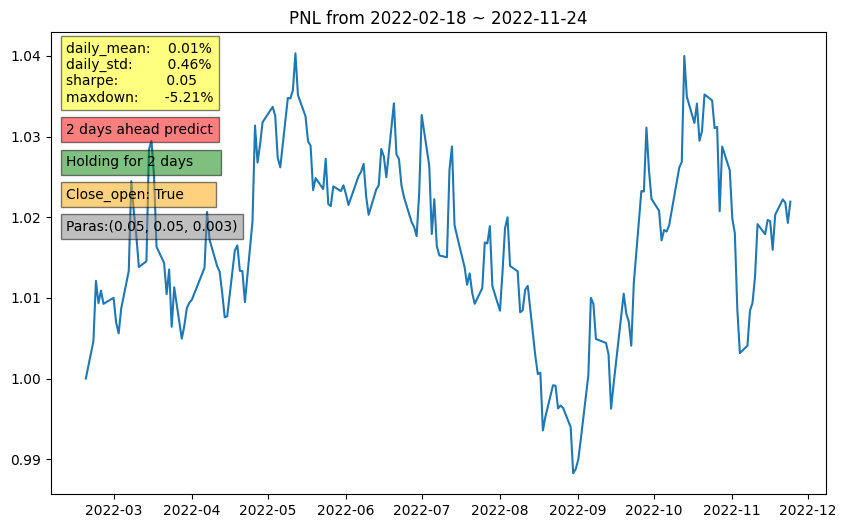

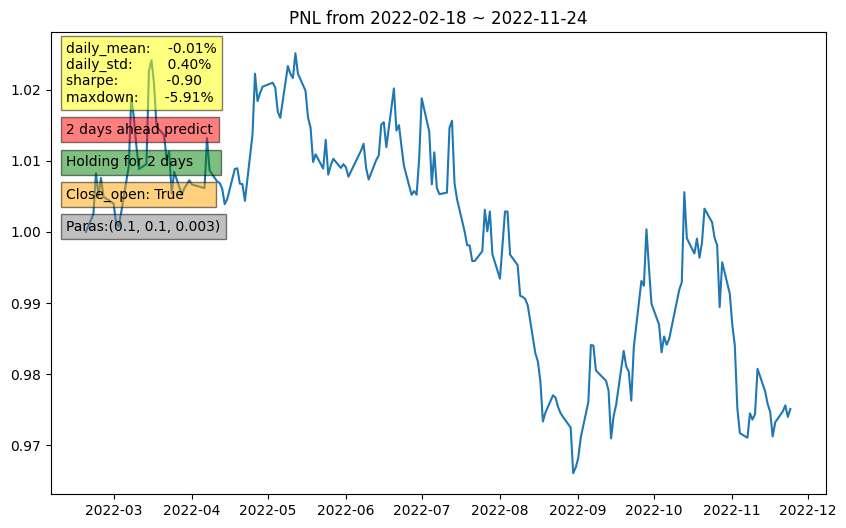

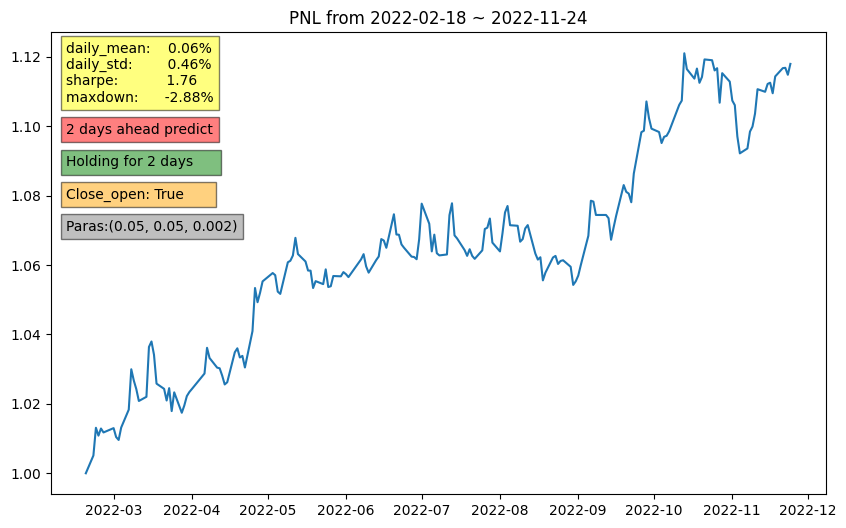

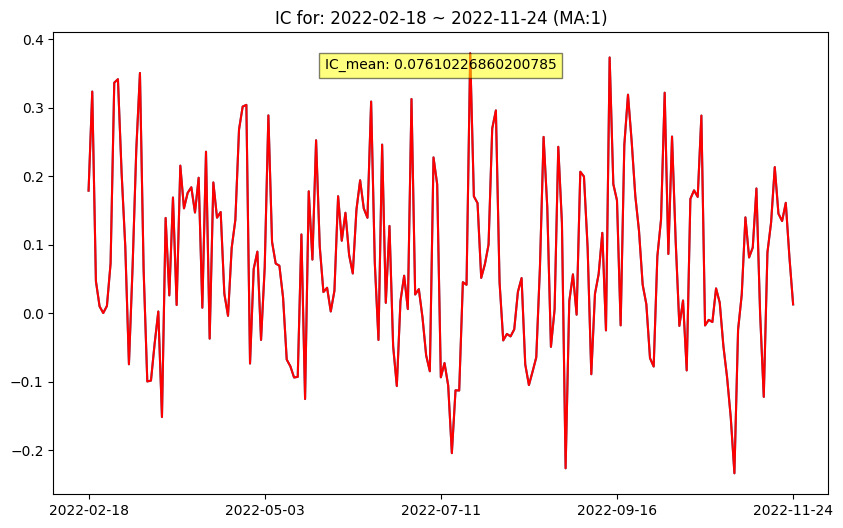

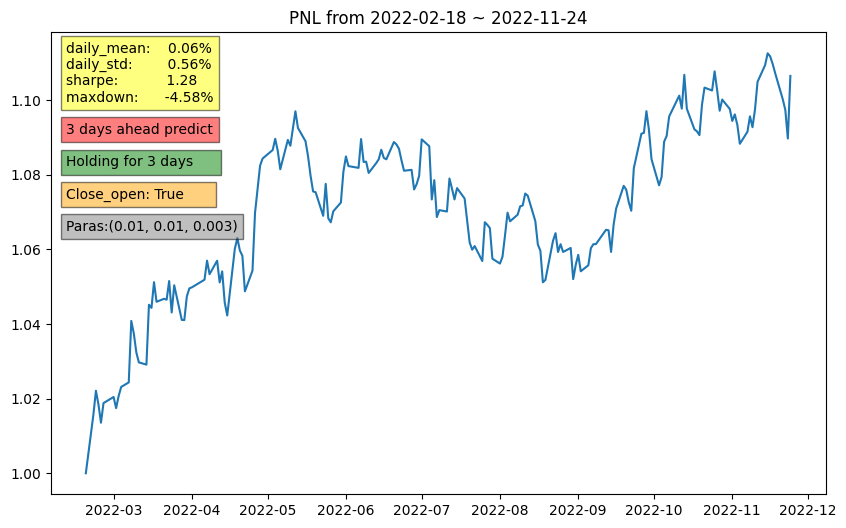

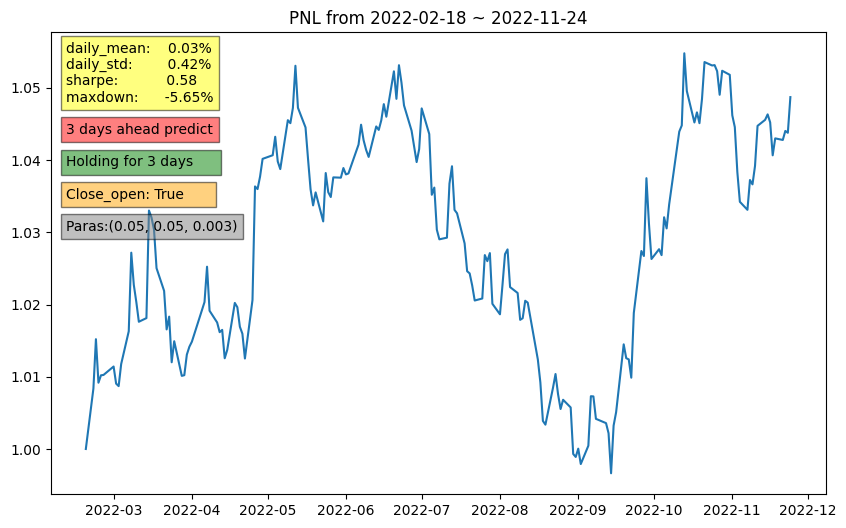

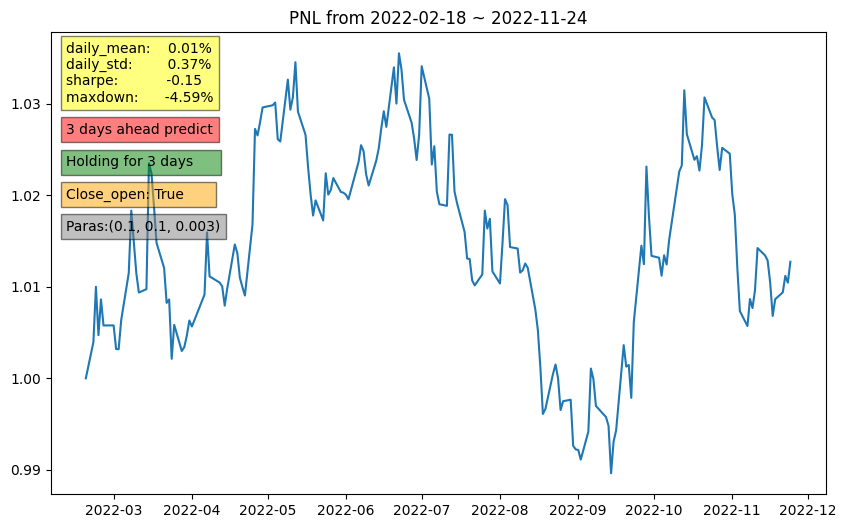

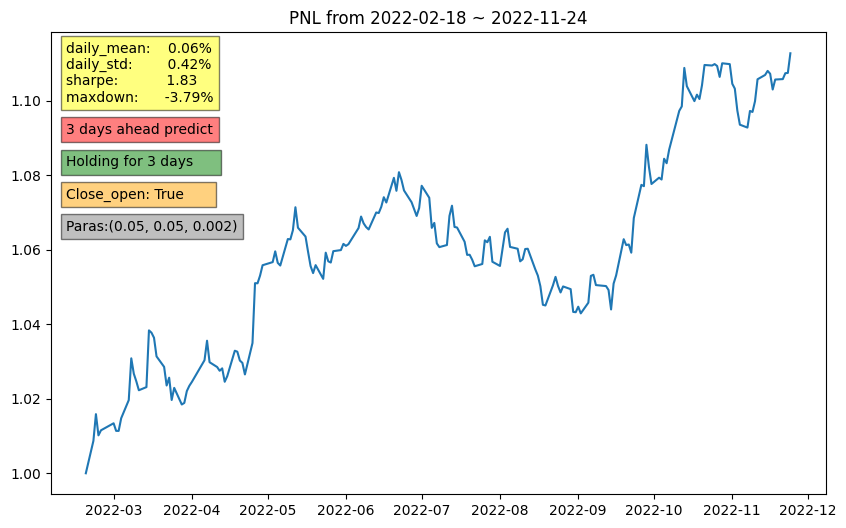

In [3]:
for Y_path in ['_cc_1','_oc_1','_oc_2','_oc_3']:
    print('Return_type:' + Y_path)
    model_strategy_return(Y_path='/home/qianshuofu/factor_qianshuofu/Data/data_label{}.npy'.format(Y_path),
                          parameters=[(0.01,0.01,0.003),(0.05,0.05,0.003),(0.1,0.1,0.003),(0.05,0.05,0.002)])

#### Parameters : ( long_ratio, short_ratio, cost_ratio )
#### Close_close return $\qquad\qquad\qquad\qquad\qquad\qquad\qquad\ $ Close_open return
|Parameters|mean|std|sharpe|maxdown|---------|Parameters|mean|std|sharpe|maxdown|
|----------|----|---|------|-------|---------|----------|----|---|------|-------|
|(0.01, 0.01, 0.003)|0.54%|1.06%|7.93|-1.70%||(0.01, 0.01, 0.003)|0.04%|0.80%|0.65|-5.32%|
|(0.05, 0.05, 0.003)|0.14%|0.42%|5.01|-1.62%||(0.05, 0.05, 0.003)|-0.02%|0.60%|-0.78|-7.37%|
|(0.10, 0.10, 0.003)|0.04%|0.32%|1.29|-2.41%||(0.10, 0.10, 0.003)|-0.07%|0.54%|-2.24|-13.96%|
|(0.05, 0.05, 0.002)|0.24%|0.42%|8.81|-0.92%||(0.05, 0.05, 0.002)|0.08%|0.60%|1.87|-4.01%|

In [ ]:
# The ic from 2022-02-18 ~ 2022-11-24 is 0.116 for close_close return and 0.10 for close_open return. Both are bad.
# close_close backtest performance is better than close_open for the factor discern the stock up to the increase limit. But it's not easy to buyin these kind of stocks in the next day.
# The backtest performance if we decrease the long_ratio and short_ratio.
# The backtest is sensitive to the cost_ratio.

In [1]:
# Test the two groups feature model

n_groups:964,n_splits:1
group_test_starts:range(771, 964, 193)
group_train_starts:range(0, 193, 193)
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.296090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256275
[LightGBM] [Info] Number of data points in the train set: 725825, number of used features: 1005
[LightGBM] [Info] Start training from score -0.020333
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.538571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 187170
[LightGBM] [Info] Number of data points in the train set: 725825, number of used features: 734
[LightGBM] [Info] Start training from score -0.020333
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.347161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6910

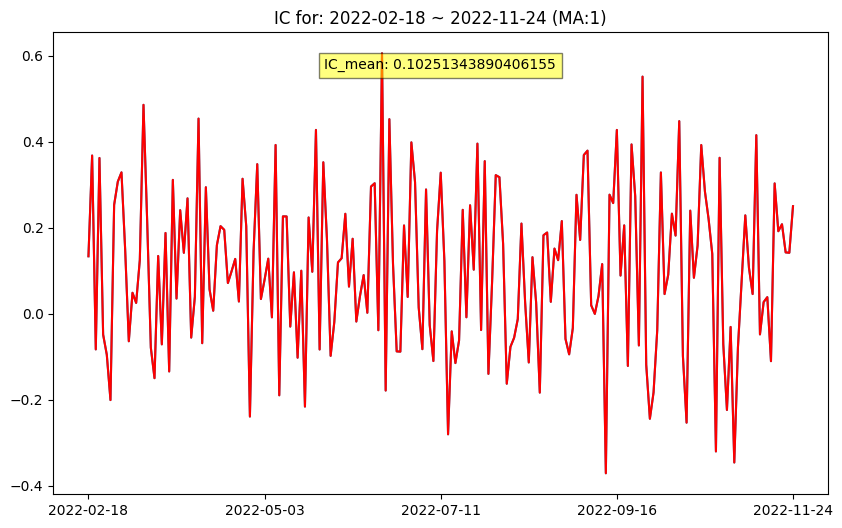

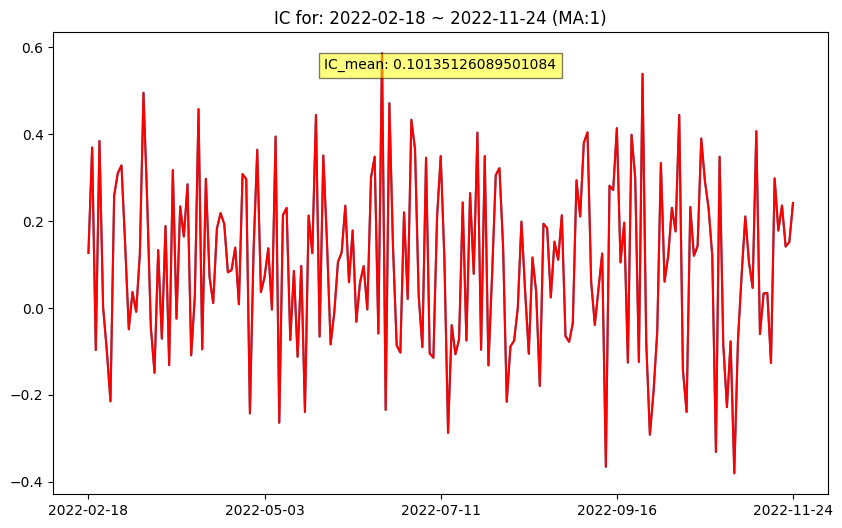

In [4]:
x_path = '/home/qianshuofu/factor_qianshuofu/Data/data_feature.npy'
Y_path = '/home/qianshuofu/factor_qianshuofu/Data/data_label_oc_1.npy'
groups_path = '/home/qianshuofu/factor_qianshuofu/Data/data_index.npy'

x,Y = np.load(x_path),np.load(Y_path)
y_return_oc, y_return_cc, y = Y[:,0], Y[:,1], Y[:,2]
groups = np.load(groups_path,allow_pickle=True)

cv = tss.PurgedGroupTimeSeriesSplit(n_splits=2)
(train_index, test_index) = next(cv.split_2(x,y,groups[:,1],splits_minus=1)) 
x_train, y_train, x_test, y_true, groups_train, groups_test = x[train_index], y[train_index], x[test_index], y[test_index], groups[:,1][train_index], groups[:,1][test_index]

model_0 = lightgbm.train(params={},train_set=lightgbm.Dataset(x_train,y_train))
feature_importance = model_0.feature_importance()
feature_index_1 = [i for i in range(len(feature_importance)) if feature_importance[i] > 0]
feature_index_2 = [i for i in range(len(feature_importance)) if feature_importance[i] == 0]

model_1 = lightgbm.train(params={},train_set=lightgbm.Dataset(x_train[:,feature_index_1],y_train))
y_pred_1 = model_1.predict(x_test[:,feature_index_1])
y_resudial = y_true - y_pred_1

model_2 = lightgbm.train(params={},train_set=lightgbm.Dataset(x_train[:,feature_index_2],y_train))
y_pred_2 = model_2.predict(x_test[:,feature_index_2])

y_pred = y_pred_1 + y_pred_2

tss.plot_ic(y,[test_index],[y_pred_1],groups[:,1],continuous=True)
tss.plot_ic(y,[test_index],[y_pred],groups[:,1],continuous=True)